In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("D:/Data_analysis/Bank_Loan_Approval_Risk/loan_approval_dataset.csv")

In [5]:
#Abt this Dataset - 1.loan id is not necessary its like row id...can drop them
#2. comes under supervised learning- cause all deatils there ,input and output
#3. important_col = income_annum, cibil score, loan_status(result), assets_values(looks like all colns are imp !!!)
#4. Need to separate the result column , which kind of supervision learning will work?!
#5. Loan status - Categorical column (Accepted & Rejected)
#6. Going to use basic Logistic Regression (After this model , going to change to check the efficiency change)
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [7]:
df.shape

(4269, 13)

In [9]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
#removing all spaces from column names
df.columns = df.columns.str.strip()

In [13]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [15]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [17]:
#education , self_employed , loan_status = categorical columns (text based columns)
#all other - numerical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [19]:
#no null values - clean dataset
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [21]:
#no duplicate values in the dataset
df.duplicated().any()

False

In [23]:
#Drop loan_id , cause its just like row id . So not going to be big use, especially for this project
#not sure abt other columns - like what to drop!? need to do bit more analysis , so will be easy to detect
df = df.drop("loan_id", axis = 1)

In [25]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [27]:
df.shape

(4269, 12)

In [29]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [31]:
numerical_cols = df.select_dtypes(include =["int64", "float64"]).columns

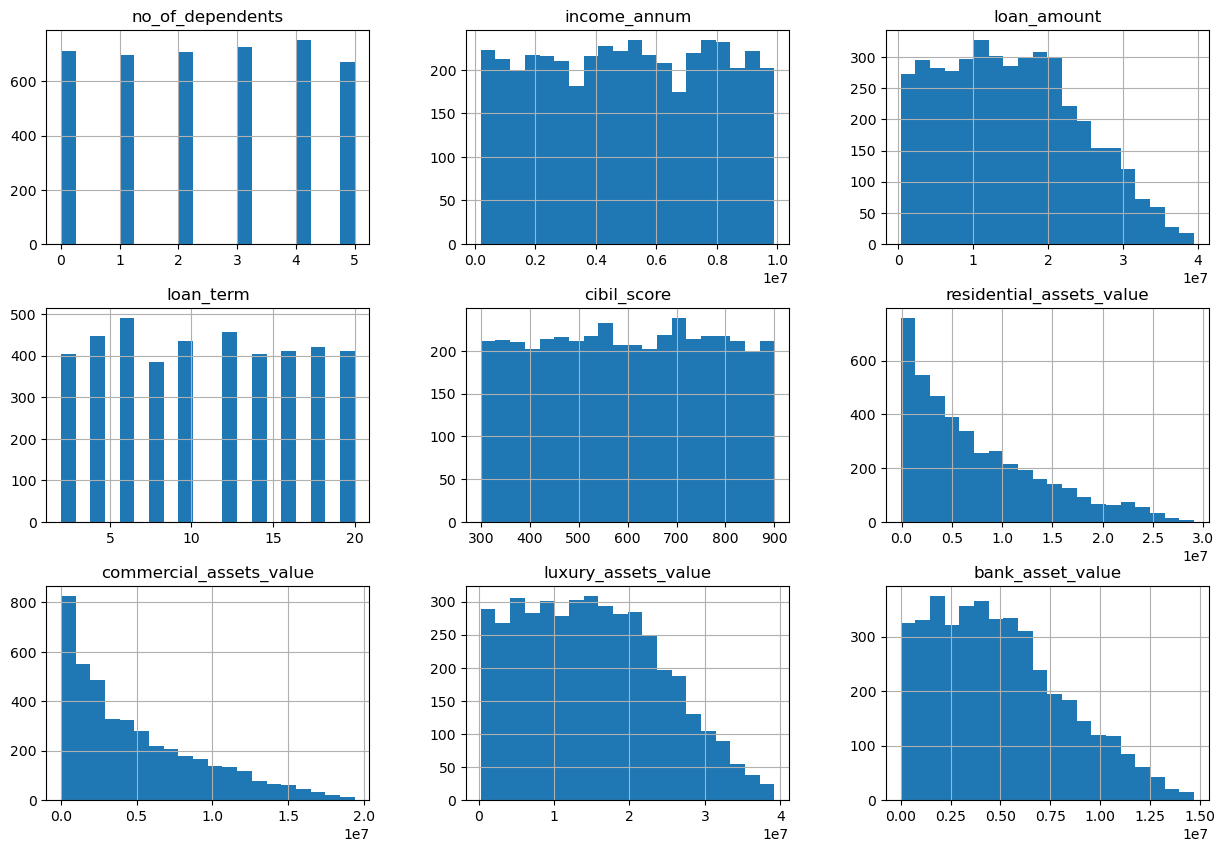

In [33]:
df[numerical_cols].hist(figsize=(15,10), bins = 20)
plt.show()

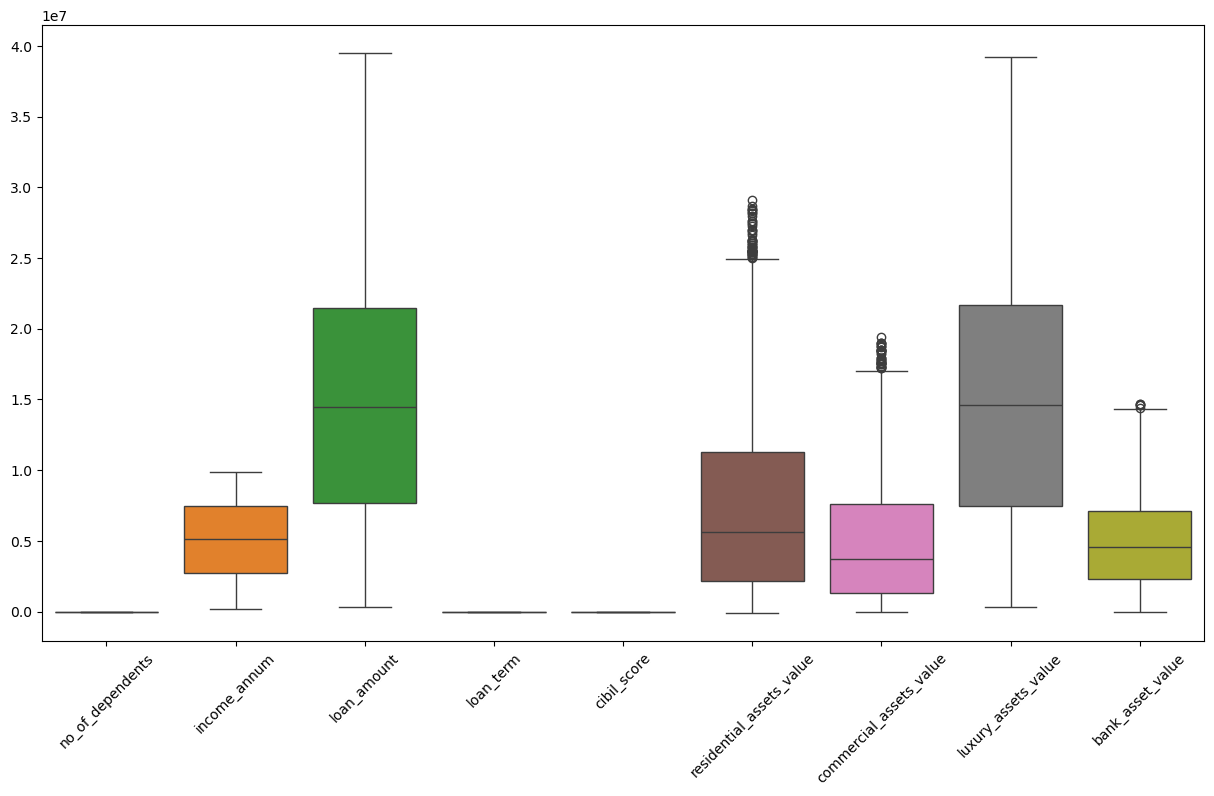

In [35]:
#income , loan_amount , luxury_asset , bank_asset = kind of looking like evenly distributed columns ( data are not skewed)
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.show()

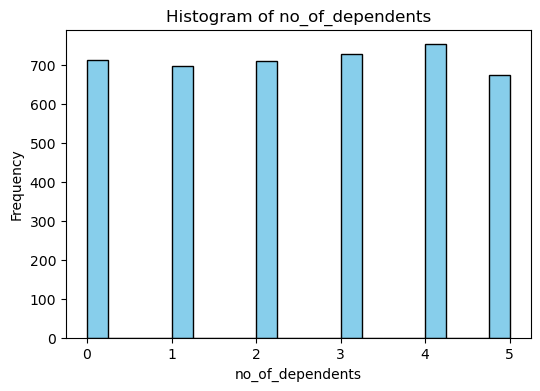

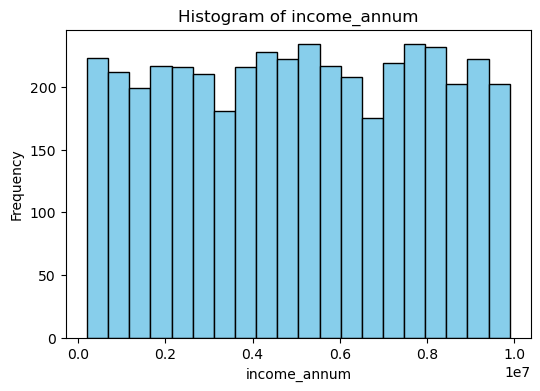

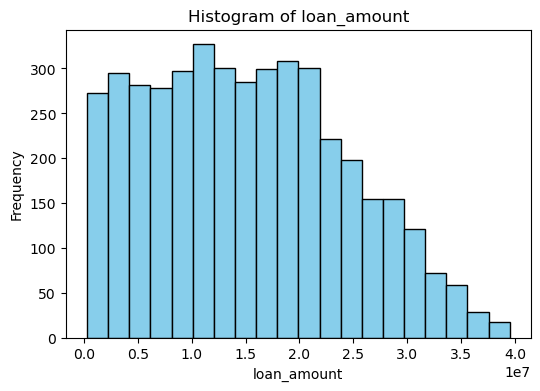

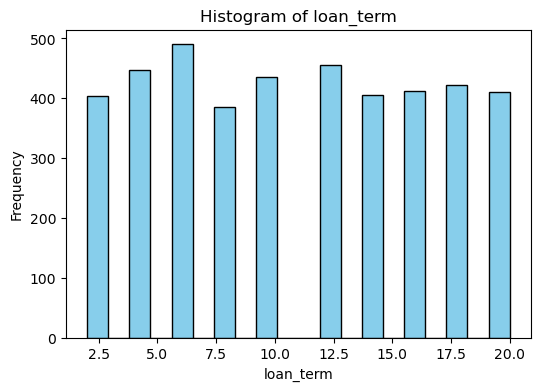

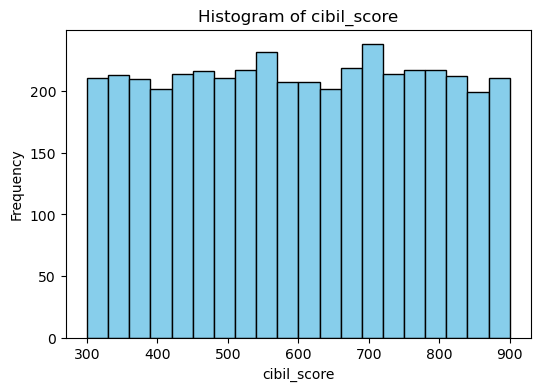

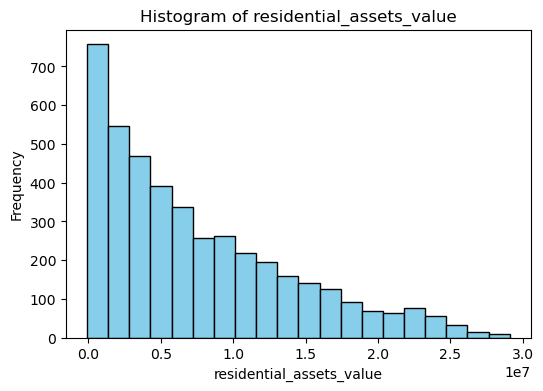

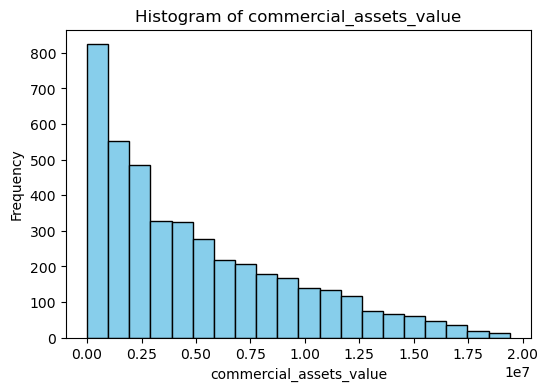

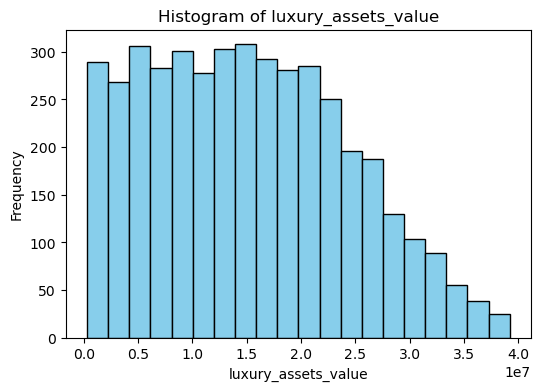

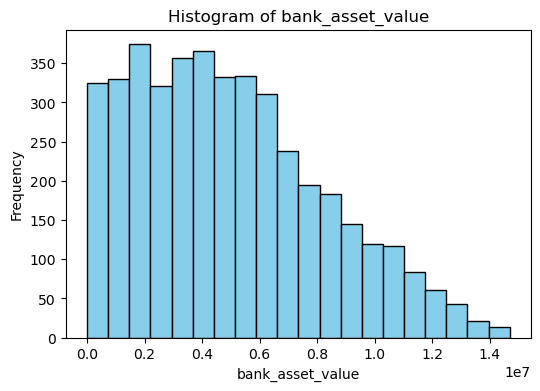

In [37]:
#visualize each column separately
for cols in numerical_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[cols], bins =20 , color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {cols}")
    plt.xlabel(cols)
    plt.ylabel("Frequency")
    plt.show()

In [68]:
#df['loan_status'] = df["loan_status"].map({'Approved':1 , 'Rejected':0})

In [72]:
#df['loan_status'] = resulting NaN values 

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4264   NaN
4265   NaN
4266   NaN
4267   NaN
4268   NaN
Name: loan_status, Length: 4269, dtype: float64

In [39]:
df['loan_status'] = df['loan_status'].str.strip()
df['loan_status'] = df['loan_status'].str.capitalize()

In [41]:
df['loan_status']

0       Approved
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
4264    Rejected
4265    Approved
4266    Rejected
4267    Approved
4268    Approved
Name: loan_status, Length: 4269, dtype: object

In [43]:
df['loan_status'] = df["loan_status"].map({'Approved':1 , 'Rejected':0})

In [45]:
df['loan_status']

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [47]:
le = LabelEncoder()

In [90]:
#resulted in approved = 0 , rejected = 1
#df['loan_status'] = le.fit_transform(df['loan_status'])

In [92]:
#df['loan_status']

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan_status, Length: 4269, dtype: int32

In [49]:
corr_matrix = df[numerical_cols].corr()

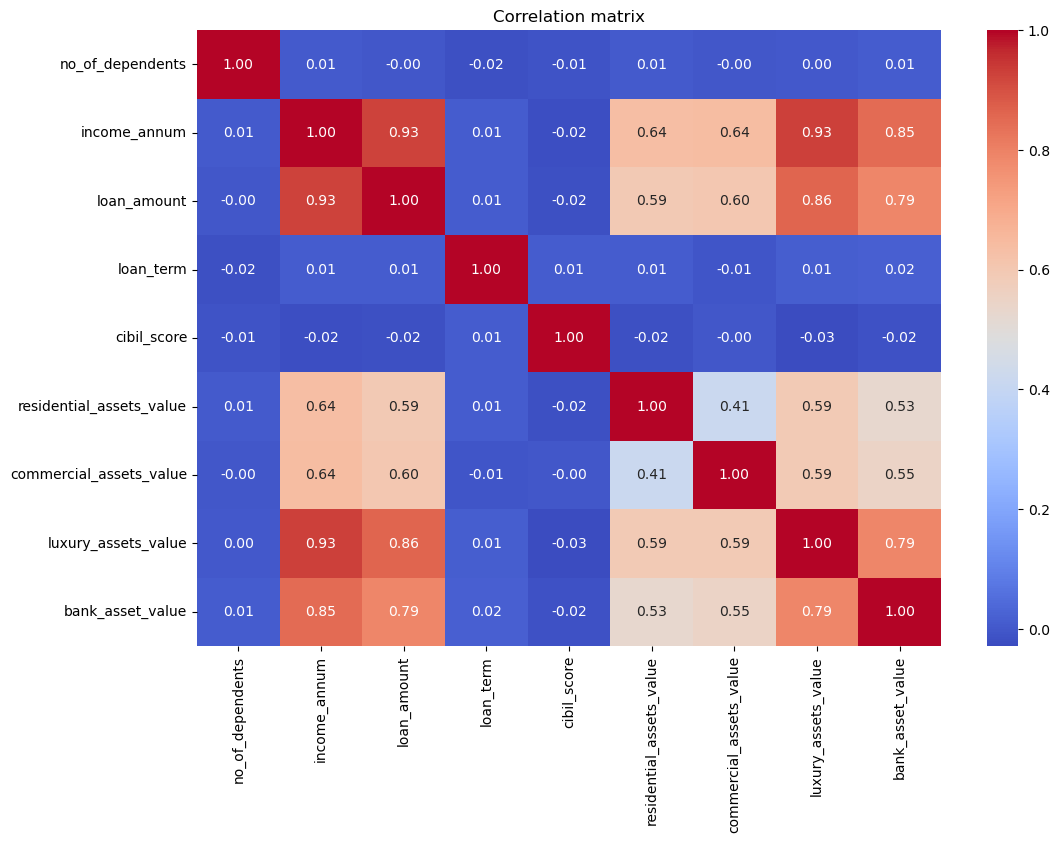

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot= True, cmap = "coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [53]:
df["education"] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])

In [57]:
X = df.drop("loan_status" , axis = 1)

In [59]:
y = df['loan_status']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))

Accuracy: 0.7295081967213115
Confusion Matrix: [[116 202]
 [ 29 507]]
Classification report:               precision    recall  f1-score   support

           0       0.80      0.36      0.50       318
           1       0.72      0.95      0.81       536

    accuracy                           0.73       854
   macro avg       0.76      0.66      0.66       854
weighted avg       0.75      0.73      0.70       854



In [67]:
df["loan_status"].value_counts(normalize=True)

loan_status
1    0.62216
0    0.37784
Name: proportion, dtype: float64

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = "balanced")
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [71]:
y_pred_rf = rf_model.predict(X_test)

In [73]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_rf))
print("Classification report:", classification_report(y_test, y_pred_rf))

Accuracy: 0.9765807962529274
Confusion Matrix: [[304  14]
 [  6 530]]
Classification report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [75]:
from sklearn.model_selection import cross_val_score

In [77]:
scores = cross_val_score(rf_model , X, y , cv=5)
print("Cross_Validation scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross_Validation scores: [0.98360656 0.9824356  0.98360656 0.9824356  0.98358734]
Mean Accuracy: 0.9831343295875419


In [79]:
feat_importance = rf_model.feature_importances_

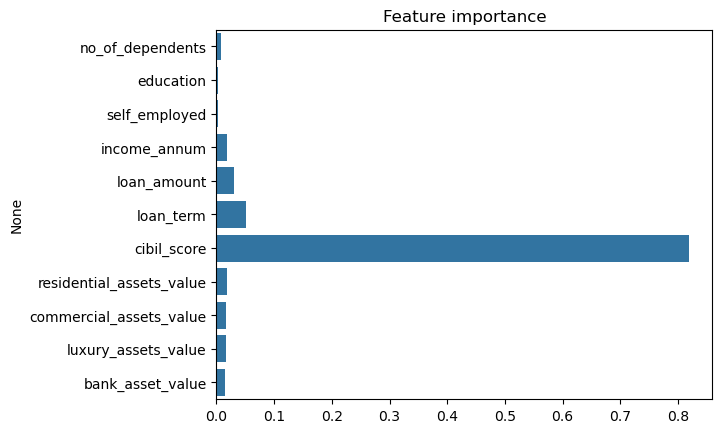

In [81]:
sns.barplot(x= feat_importance, y = X.columns)
plt.title("Feature importance")
plt.show()